<h1>Data Visualisation from whatsapp messages</h1>

In [1364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Function to parse time from Whatsapp messages

In [1278]:

def parse_time(j):
    k1 = j.find('[')
    # print (k1)
    if k1 != -1:
        k2 = j.find(']')
        t1 =  j[k1+1:k2]
        try:    
            # t1 = pd.to_datetime(t1)
            t1 = datetime.strptime(t1, '%d/%m/%Y, %H:%M:%S %p').strftime("%Y-%m-%d %H:%M:%S")
        except:
            t1 = 0
            
        # print( 'k2 :', k2)
        return t1,k2
    else:
        return 0,0


Function to extract time from Whatsapp messages

In [1279]:

def fetch_time(j):
    k1 = j.find('[')
    # print (k1)
    if k1 != -1:
        k2 = j.find(']')
        t1 =  j[k1+1:k2]
        # t1 = pd.to_datetime(t1)

        try:    
            # t1 = pd.to_datetime(t1)
            t1 = datetime.strptime(t1, '%d/%m/%Y, %H:%M:%S %p').strftime("%Y-%m-%d %H:%M:%S")
        except:
            t1 = 'deleted'
        # print( 'k2 :', k2)
        return t1
    else:
        return 0



Function to extract author name from Whatsapp messages

In [1280]:
def fetch_author(j):
    k1 = j.find('[')
    # print (k1)
    if k1 != -1:
        k2 = j.find(']')

        try:    
            # t1 = pd.to_datetime(t1)
            t1 =  j[k2+1:].split(':')[0].strip()
        except:
            t1 = 0

        return t1
    else:
        return 0


Function to extract body of the message from Whatsapp messages

In [1281]:
def chk_rm(j):
    k1 = j.find('[')
    # print (k1)
    if k1 != -1:
        k2 = j.find(']')
        try:

            t1 =  j[k2+1:].split(':')[1].strip()
        except:
            t1 = 0
        
        # t1 = pd.to_datetime(t1)
        # print( 'k2 :', k2)
        return t1
    else:
        return j

Routine to collect all messages  in a array

In [1284]:
data = []
conversation = 'pbv_chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    msg = []
    msg1 = '1'
    date, time, author = None, None, None
    k = 0
    while True:
        k += 1
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        # print(line)

        x,y = parse_time(line)

        if y != 0:
            
            msg.append(msg1)
            # msg1 = str(x) + line[5:]
            msg1 = line +"\n"

        else:

            msg1 = msg1 + "\n"+ line



In [1353]:
df.head()

,time,author,msg_real,len,date,weekday,day
1,2022-01-09 07:55:25,Babu Elumalai Dr,‎image omitted,16.0,2022-01-09,Sun,9
2,2022-01-09 04:33:08,Jayasudhahar PBV MG,Tower 13\n\nSingle BHK\n(Basket ball court - p...,19.0,2022-01-09,Sun,9
3,2022-01-09 06:22:30,‪+1 (647) 235‑3139‬,Hi all. Few of our hall tiles are bumped up.....,19.0,2022-01-09,Sun,9
4,2022-01-09 10:31:32,Rebecca 9 A,Seepage issues are responsibility of the build...,11.0,2022-01-09,Sun,9
5,2022-01-10 05:39:52,PBV Sudha balakrishnan,Covid / Omicron postive cases Mandatory Details,22.0,2022-01-10,Mon,10


Create dataframe from array

In [1286]:
df = pd.DataFrame(msg, columns = ['msg'])

Extract time, author and body of message into columns

In [1287]:
df['time'] =  df['msg'].apply(fetch_time)
df['author'] =  df['msg'].apply(fetch_author)
df['msg_real'] =  df['msg'].apply(chk_rm)
df.drop(df[df['time']=='deleted'].index, inplace =True)
df.drop('msg', axis=1, inplace=True)

In [1355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 1 to 2349
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      2342 non-null   datetime64[ns]
 1   author    2342 non-null   object        
 2   msg_real  2342 non-null   object        
 3   len       2342 non-null   float64       
 4   date      2342 non-null   object        
 5   weekday   2342 non-null   object        
 6   day       2342 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 146.4+ KB


In [1289]:
df.head()

,time,author,msg_real
0,0,0,1
1,2022-01-09 07:55:25,Babu Elumalai Dr,‎image omitted
2,2022-01-09 04:33:08,Jayasudhahar PBV MG,Tower 13\n\nSingle BHK\n(Basket ball court - p...
3,2022-01-09 06:22:30,‪+1 (647) 235‑3139‬,Hi all. Few of our hall tiles are bumped up.....
4,2022-01-09 10:31:32,Rebecca 9 A,Seepage issues are responsibility of the build...


Bar chart to check message count of authors

<AxesSubplot:xlabel='author', ylabel='count'>

c:\Users\jawahar\github\test_algo\testalgo\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


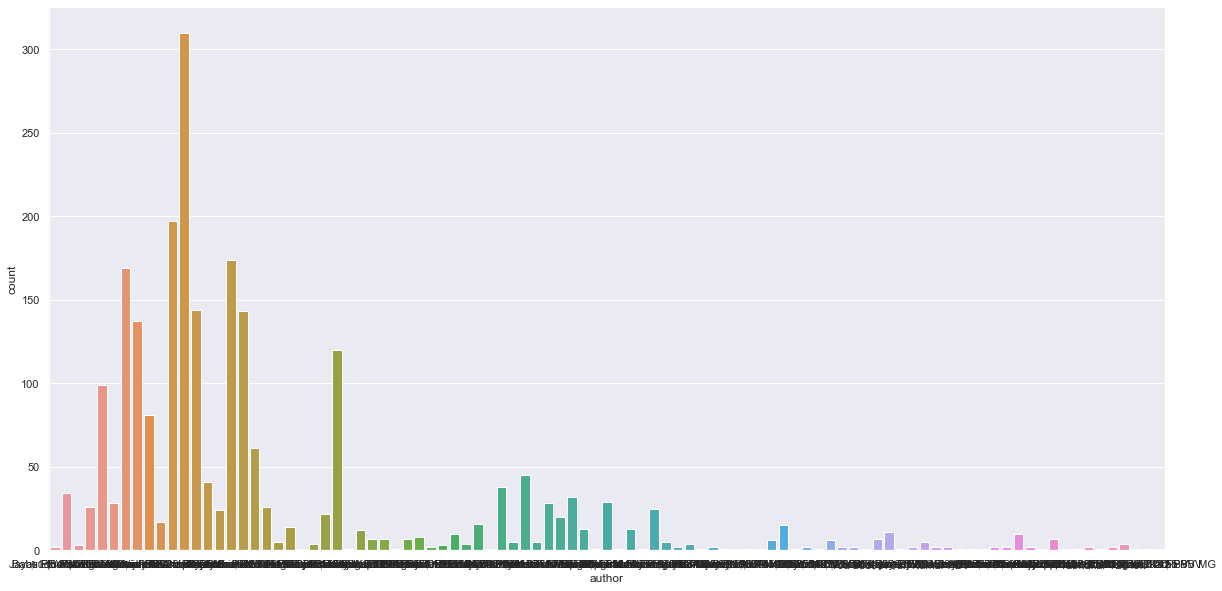

In [1359]:
sns.countplot(x='author', data = df)


Visualisation

In [1316]:
def pie_on(df, topn, title) :
    jf = pd.DataFrame(df.groupby('author').count()['msg_real'].sort_values(ascending=False)).reset_index()
    jf['author'][topn:] = 'others'
    # jf.groupby('author').sum()['msg_real']
    jf['author'][topn:] = 'others'
    fig, ax = plt.subplots(figsize=(15, 10))
    x = jf.groupby('author').sum()['msg_real']
    title = title + str(topn)
    ax.pie(x, labels =  x.index, autopct='%.1f%%', textprops={'size': 'x-large'})
    ax.set_title(title)
    plt.tight_layout()



In [1317]:
def bar_on(df, topn, title) :
    # topn = 30
    fig, ax = plt.subplots(figsize=(15, 10))
    jf = pd.DataFrame(df.groupby('author').count()['msg_real'].sort_values(ascending=False)).reset_index()
    jf['author'][topn:] = 'others'
    x = jf.groupby('author').sum()['msg_real'].sort_values(ascending=True)
    ax.barh(y = x.index,  width = x, height =0.7)
    title = title + str(topn)
    ax.set_title(title,fontsize=20)
    # ax.set_xlabel(fontsize=20)
    # ax.set_title('Sport Popularity')
    plt.tight_layout()

C:\Users\jawahar\AppData\Local\Temp\ipykernel_17676\3736096749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jf['author'][topn:] = 'others'
C:\Users\jawahar\AppData\Local\Temp\ipykernel_17676\3736096749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jf['author'][topn:] = 'others'


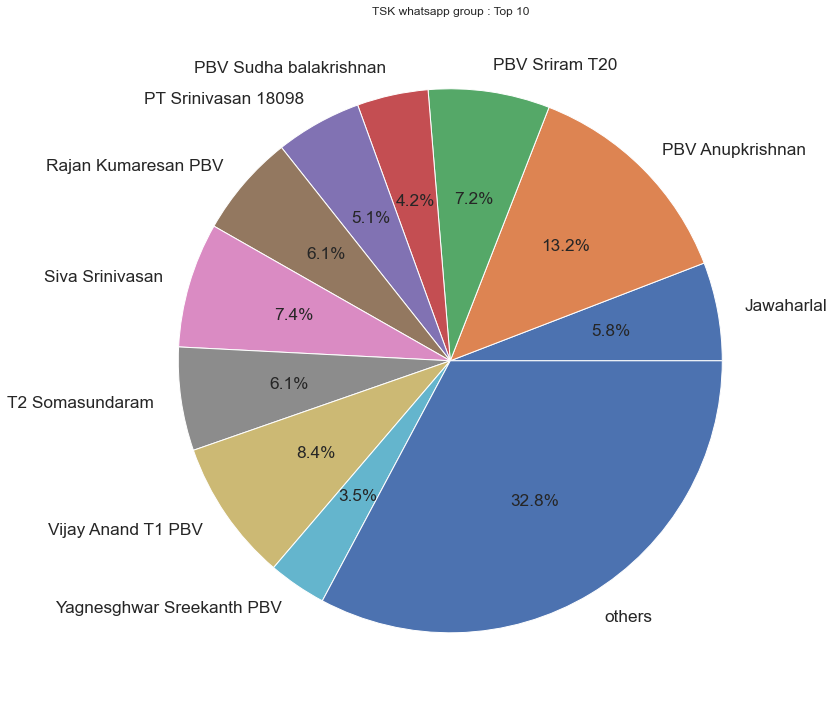

In [1318]:
pie_on(df,10, 'TSK whatsapp group : Top ')


C:\Users\jawahar\AppData\Local\Temp\ipykernel_17676\2406310216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jf['author'][topn:] = 'others'


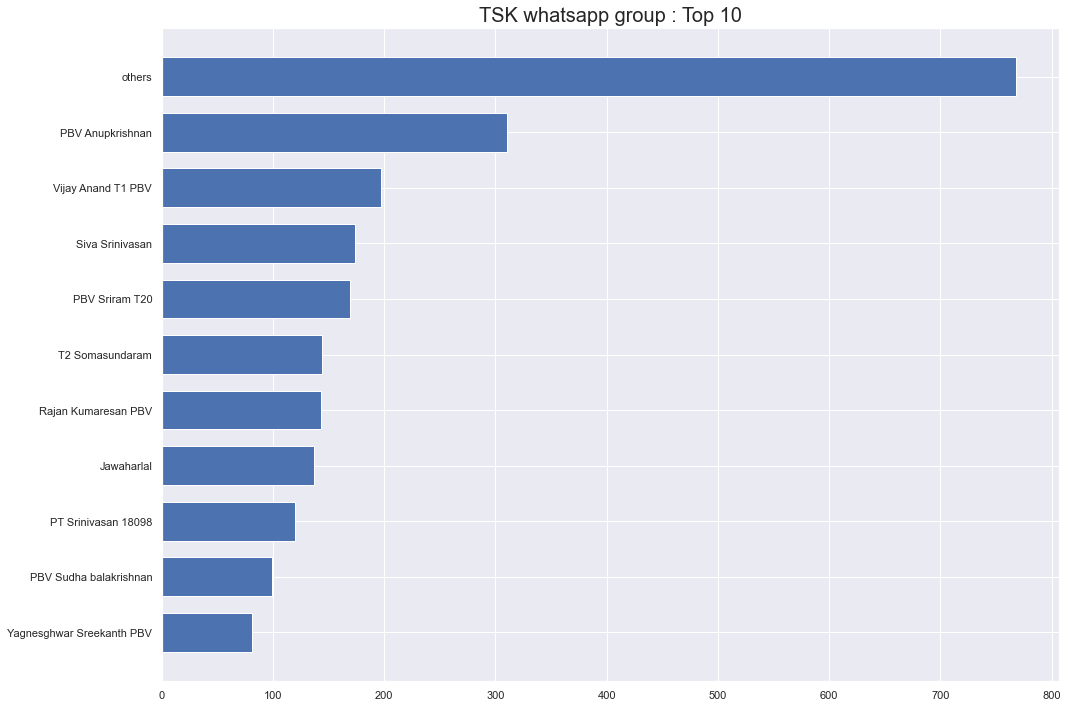

In [1319]:
bar_on(df,10, 'TSK whatsapp group : Top ')

In [1320]:
# df.drop('time')

# df.drop(df[df['time']==0].index, inplace=True)


df.time = pd.to_datetime(df.time)


# df.drop

C:\Users\jawahar\AppData\Local\Temp\ipykernel_17676\2221524770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time = pd.to_datetime(df.time)


In [1365]:
df['date'] = pd.DatetimeIndex(df['time']).date

df['weekday'] = df['time'].dt.strftime("%a")


In [1366]:
df.head()

,time,author,msg_real,len,date,weekday,day
1,2022-01-09 07:55:25,Babu Elumalai Dr,‎image omitted,16.0,2022-01-09,Sun,9
2,2022-01-09 04:33:08,Jayasudhahar PBV MG,Tower 13\n\nSingle BHK\n(Basket ball court - p...,19.0,2022-01-09,Sun,9
3,2022-01-09 06:22:30,‪+1 (647) 235‑3139‬,Hi all. Few of our hall tiles are bumped up.....,19.0,2022-01-09,Sun,9
4,2022-01-09 10:31:32,Rebecca 9 A,Seepage issues are responsibility of the build...,11.0,2022-01-09,Sun,9
5,2022-01-10 05:39:52,PBV Sudha balakrishnan,Covid / Omicron postive cases Mandatory Details,22.0,2022-01-10,Mon,10


Text(0, 0.5, 'No. of messages')

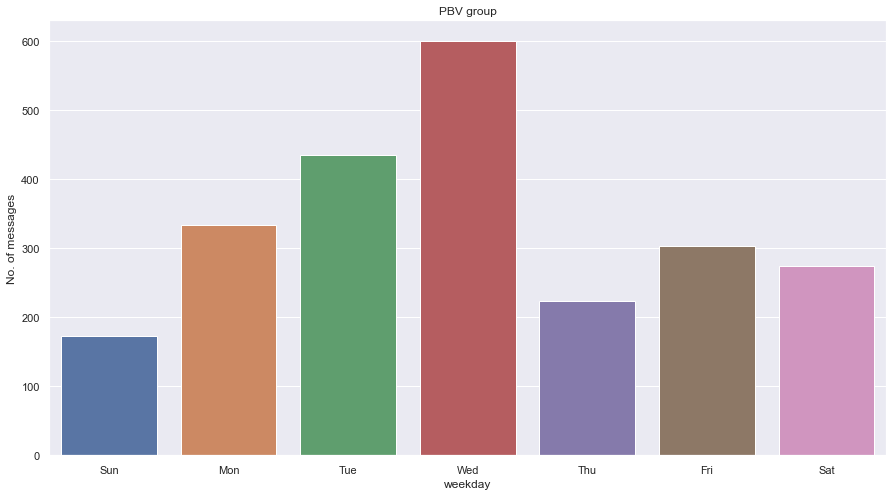

In [1368]:
# sns.countplot(data=x, x =x.index)
# plt.bar(x=x.index, height= x)
# sns.countplot(height=df, x =x.index)
# sns.set.title('dd')
plt.figure(figsize = (15,8));
ax = sns.countplot( x =df.weekday);
ax.set_title('PBV group')
ax.set_ylabel('No. of messages')

# ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

Text(0, 0.5, 'No. of messages')

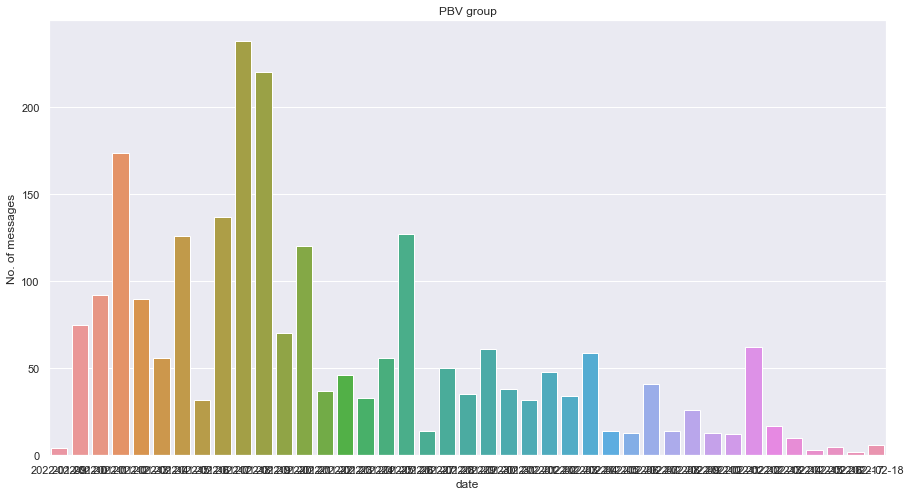

In [1347]:
# sns.countplot(data=x, x =x.index)
# plt.bar(x=x.index, height= x)
# sns.countplot(height=df, x =x.index)
# sns.set.title('dd')
plt.figure(figsize = (15,8));
ax = sns.countplot( x =df.date);
ax.set_title('PBV group')
ax.set_ylabel('No. of messages')

# ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

<AxesSubplot:xlabel='date'>

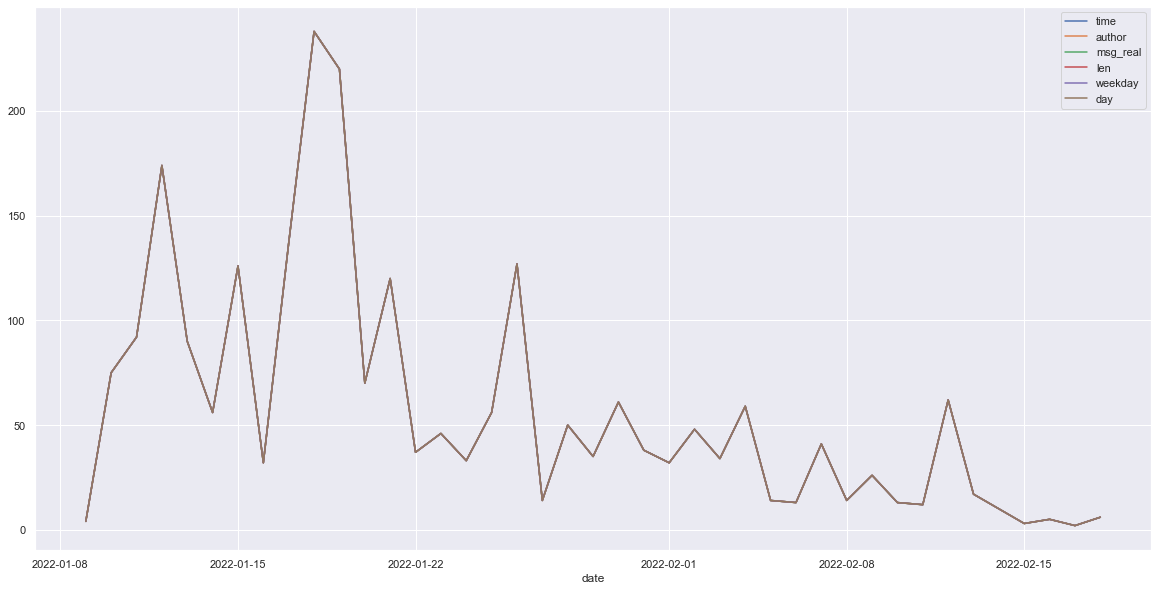

In [1349]:
# df[''].plot

df.groupby('date').count().plot()
